# 3-я лабораторная

Конспекты:

https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0

https://translated.turbopages.org/proxy_u/en-ru.ru.f9f627fb-6263fb87-83efd13d-74722d776562/https/en.wikipedia.org/wiki/Powell%27s_dog_leg_method

https://wikidea.ru/wiki/Powell%27s_dog_leg_method

https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D1%80%D0%BE%D0%B9%D0%B4%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BB%D0%B5%D1%82%D1%87%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%93%D0%BE%D0%BB%D1%8C%D0%B4%D1%84%D0%B0%D1%80%D0%B1%D0%B0_%E2%80%94_%D0%A8%D0%B0%D0%BD%D0%BD%D0%BE

https://habr.com/ru/post/333356/

https://www.youtube.com/watch?v=IKO7SZKgbNo

https://fmin.xyz/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

plt.rcParams["figure.figsize"] = (20, 10)

np.set_printoptions(suppress=True)

In [ ]:
# X - набор переменных
# A - набор аргументов
def f1_1_2d(X, A): ## len(A) == a, len(X) == n-1
    if (len(A) != 3):
        raise
    if (len(X) != 1):
        raise
    from math import sin
    return A[0]*X[0] + A[1]*sin(X[0]) + A[2]


In [ ]:
from random import uniform

def arrayRandom(n, down: int, up: int):
    #global HUp, WUp, HDown, WDown
    return np.array([uniform(down, up) for i in range(n)])

# D - теперь массив массивов наборов точек [..., z], где z - последний элемент массива - результат, зависящий от функции f, набора правильных аргументов A и первых n-1 переменных в массиве D[i], определяющие положение точки: z = f(D[i][:-1], A)
# для примера на 2d плоскости: D = [[1, 2]] - массив из одной точки: [1, 2], x=1, y=2. Тогда было использовано такое A и такая f, что y = f([x], A)

# n - R^n пространство. Ограничение: n >= 2. Для construct_2d() всегда n=2

# f - функция
# a - кол-во аргументов
# l - кол-во точек. Ограничение: l >= n
# ans - свои аргументы (срандомит, если не дано)
# left_x, right_x - граница x для графика
# down, up - граница для значений аргументов.
# EXP - случайное отклонение по y
def construct_2d(f, a, l, EXP, left_x, right_x, down, up, ans=None):
    if l < 2:
        raise
    if ans != None:  # Свой сгенерированный ответ
        if len(ans) != a:
            raise
        A_gen = np.array(ans)
    else:
        A_gen = np.array([uniform(down, up) for i in range(a)])  # Рандомный сгенерированный ответ
    
    from random import random
    # D - массив точек
    D = np.array([[i, f([i], A_gen) + random()*EXP - EXP/2] for i in arrayRandom(l, left_x, right_x)]) #[x, y]
    #print(A_gen)
    #print(D)
    return D, A_gen


In [ ]:
f = f1_1_2d
a = 3
l = 30
left_x, right_x = 0, 20
EXP = 1
D, A_gen =  construct_2d(f, a, l, EXP, left_x, right_x, 0, 5, [0.4, 4.7, 2])

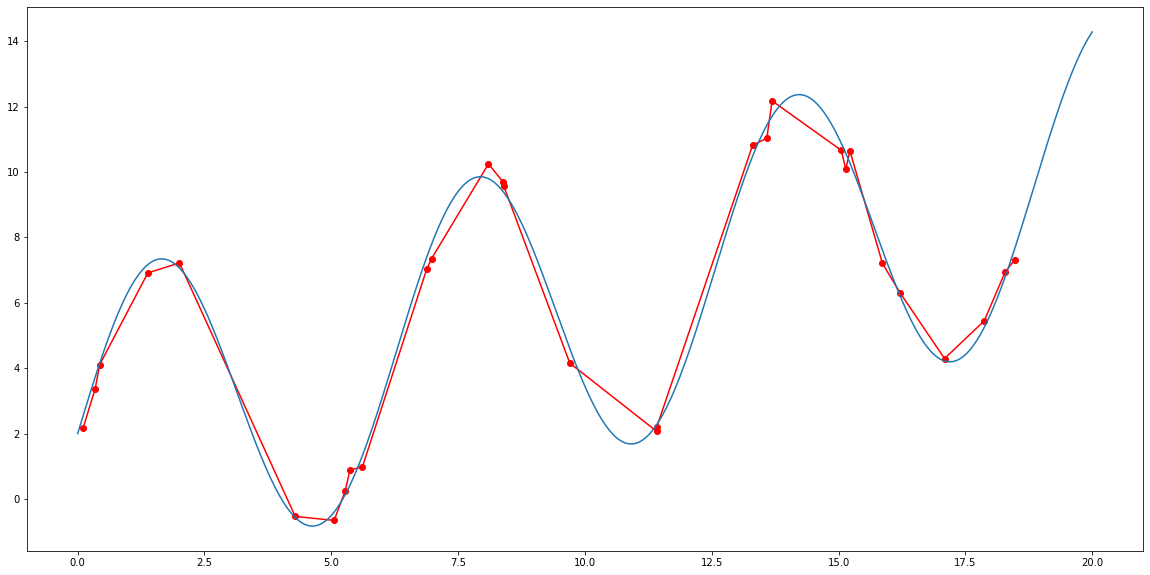

In [ ]:
D_sort = D[D[:, 0].argsort()]
#print(A_gen)
#print(D)

# 2d only
plt.plot(D_sort[:, 0], D_sort[:, 1], "ro-")

t = np.linspace(left_x, right_x, 1000)
X, Y = np.meshgrid(t, t)
plt.plot(t, np.array([f([i], A_gen) for i in t]), "-")
#ax = plt.figure().add_subplot()
#ax.plot_surface(X, f(X, A_gen), cmap=cm.coolwarm, alpha=0.5)
#plt.plot([0, 20], [A_gen[0], A_gen[0]+20*A_gen[1]], "o-")
plt.show()

In [ ]:
def dot_deviation(f, A, dot):
    return dot[-1] - f(dot[:-1], A)

def sum_square(f, A, D):
    sum_diff = 0
    for dot in D:
        sum_diff += (dot_deviation(f, A, dot))**2
    return sum_diff


### Алгоритмы задания 1: 
Gauss-Newton и Powell Dog Leg

In [ ]:
def gradForOne(f, A, dot, i, lr):
    A_delta = A.copy()
    A_delta2 = A.copy()
    A_delta[i] += lr
    A_delta2[i] -= lr
    return (dot_deviation(f, A_delta, dot) - dot_deviation(f, A_delta2, dot)) / (2 * lr)

def gauss_newton(f, A, D, lr, max_iterations, epsilon):
    iterations_spent = 0
    planes = np.zeros((1, len(A)))
    A_zn = sum_square(f, A, D)    
    val = np.array([A_zn])
    planes[0] = A

    from numpy.linalg import pinv
    
    J = np.array([[gradForOne(f, A, dot, i, lr) for i in range(len(A))] for dot in D])
    JO = pinv(J)

    A = A - JO @ np.array([dot_deviation(f, A, dot) for dot in D])

    A_zn = sum_square(f, A, D)
    planes = np.append(planes, [A], axis=0)
    val = np.append(val, [A_zn])
    iterations_spent += 1

    while abs(val[-2] - val[-1]) > epsilon:
        if iterations_spent >= max_iterations:
            print("Can't reach defined precision. It takes more than {} iterations".format(max_iterations))
            break

        J = np.array([[gradForOne(f, A, dot, i, lr) for i in range(len(A))] for dot in D])
        JO = pinv(J)
        A = A - JO @ np.array([dot_deviation(f, A, dot) for dot in D])

        A_zn = sum_square(f, A, D)  

        planes = np.append(planes, [A], axis=0)
        val = np.append(val, [A_zn])
        iterations_spent += 1

    return A, planes, val

def dist(A):
    return sum(i**2 for i in A)**0.5

def get_step(delta, dgn, dsd, epsilon, A):
    dist_dgn = dist(dgn)
    if dist_dgn <= delta:
        return dgn
    dist_dsd = dist(dsd)
    if dist_dgn > delta and dist_dsd > delta:
        return (delta/dist_dsd) * dsd
    
    l = dsd
    r = dgn
    dist_l = dist_dsd
    dist_r = dist_dgn
    while epsilon < dist_r - dist_l:
        m = (l + r) / 2
        dist_m = dist(m)
        if (dist_m > delta):
            r = m
            dist_r = dist_m
        else:
            l = m
            dist_l = dist_m
    return l

def powell_dog_leg(f, A, D, lr, delta, max_iterations, epsilon, epsilon_binsearch):
    iterations_spent = 0
    planes = np.zeros((1, len(A)))
    A_zn = sum_square(f, A, D)    
    val = np.array([A_zn])
    planes[0] = A

    from numpy.linalg import pinv
    
    J = np.array([[gradForOne(f, A, dot, i, lr) for i in range(len(A))] for dot in D])
    AF = np.array([dot_deviation(f, A, dot) for dot in D])
    dgn = - pinv(J) @ AF
    dsd = - J.T @ AF
    A = A + get_step(delta, dgn, dsd, epsilon_binsearch, A)

    A_zn = sum_square(f, A, D)
    planes = np.append(planes, [A], axis=0)
    val = np.append(val, [A_zn])
    iterations_spent += 1

    while abs(val[-2] - val[-1]) > epsilon:
        if iterations_spent >= max_iterations:
            print("Can't reach defined precision. It takes more than {} iterations".format(max_iterations))
            break

        J = np.array([[gradForOne(f, A, dot, i, lr) for i in range(len(A))] for dot in D])
        AF = np.array([dot_deviation(f, A, dot) for dot in D])
        dgn = - pinv(J) @ AF
        dsd = - J.T @ AF
        A = A + get_step(delta, dgn, dsd, epsilon_binsearch, A)

        A_zn = sum_square(f, A, D)  

        planes = np.append(planes, [A], axis=0)
        val = np.append(val, [A_zn])
        iterations_spent += 1

    return A, planes, val


[0.40777571 4.73542974 1.87066342]
[1513.99551466    2.77924976    2.77924976]
[[0.         0.         0.        ]
 [0.40777571 4.73542974 1.87066342]
 [0.40777571 4.73542974 1.87066342]]


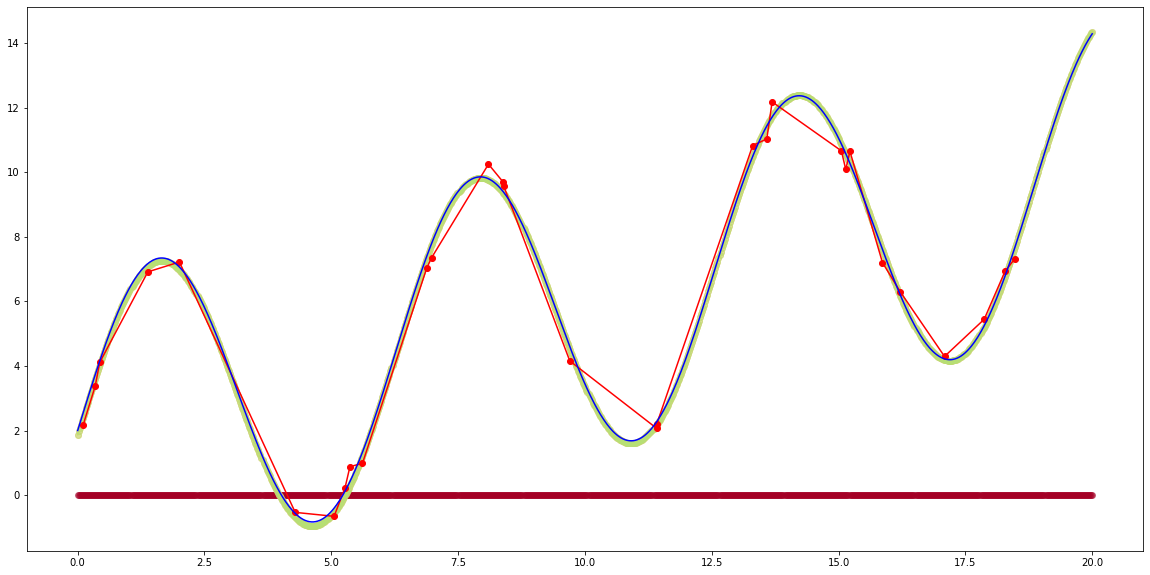

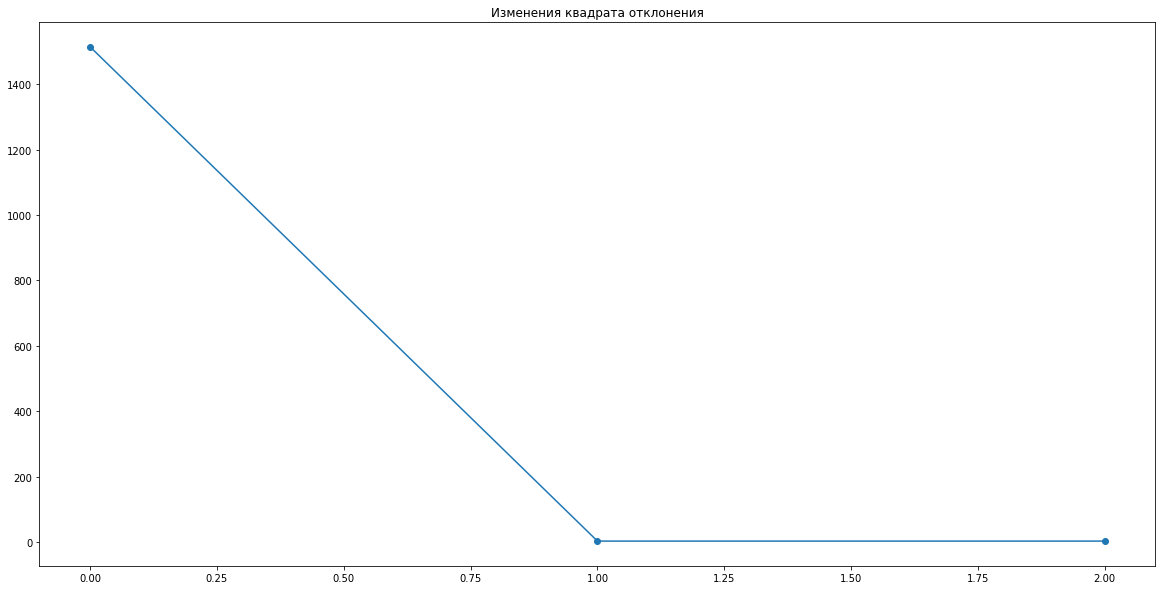

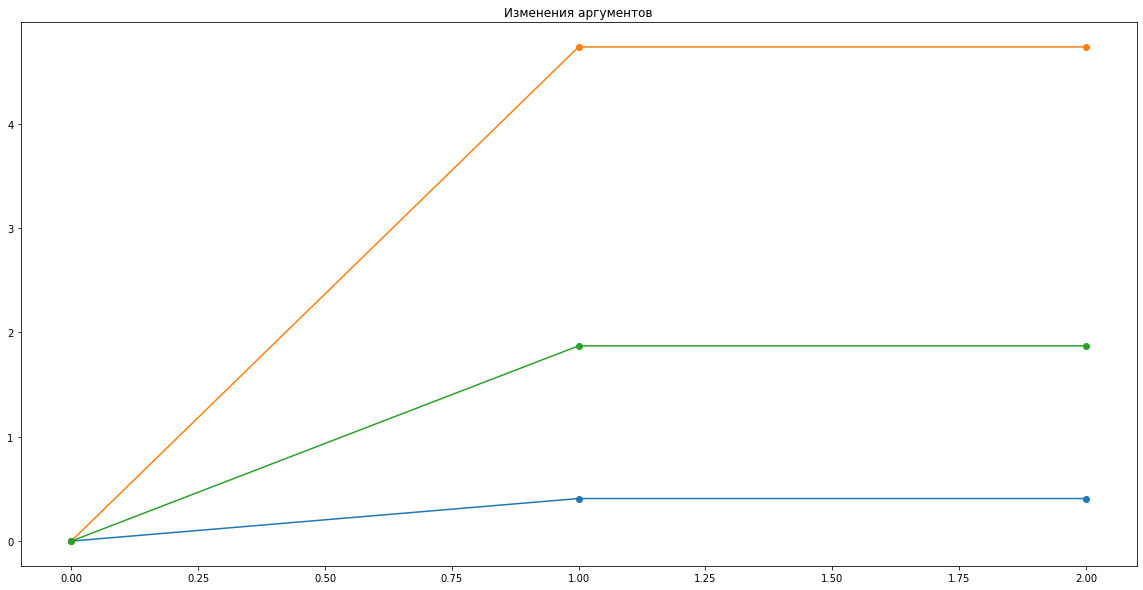

In [ ]:
f = f1_1_2d
A_start = np.array([0,0,0], float)
lr = 0.00006  # шаг
max_iterations = 1000  # макс.количество итераций
epsilon = 0.00001  # До какой точности будет разница функций

A_curr, planes, val = gauss_newton(f, A_start, D, lr, max_iterations, epsilon)
print(A_curr)
print(val[-min(10, len(val)):])
print(planes[-min(10, len(planes)):])


for i in range(0, len(planes)):
    plt.plot(t, np.array([f([j], planes[i]) for j in t]), "o-", color=cm.RdYlGn(i / len(planes)), alpha=0.5)
plt.plot(D_sort[:, 0], D_sort[:, 1], "ro-")
plt.plot(t, np.array([f([i], A_gen) for i in t]), "b-") # Синий - изначально сгенерированный
#plt.plot(t, np.array([f([i], A_curr) for i in t]), "g-") # Зеленый - полученный
plt.show()

plt.title("Изменения квадрата отклонения")
plt.plot(val, 'o-')
plt.show()

plt.title("Изменения аргументов")
for i in range(len(A_curr)):
    plt.plot(planes[:, i], 'o-')
plt.show()

[0.40777571 4.73542974 1.87066342]
[12.49440773 12.4935262  12.49265631 12.49179791 12.49095083 12.49011489
 12.48928993 12.48847581  2.77924976  2.77924976]
[[0.46403311 4.70933798 1.78923745]
 [0.36429504 4.70993813 1.78202939]
 [0.46397805 4.70993149 1.78998533]
 [0.3642402  4.71052606 1.7827736 ]
 [0.46392351 4.71051389 1.79072591]
 [0.36418589 4.71110298 1.78351055]
 [0.46386948 4.71108538 1.79145925]
 [0.3641321  4.71166908 1.7842403 ]
 [0.40777571 4.73542974 1.87066342]
 [0.40777571 4.73542974 1.87066342]]


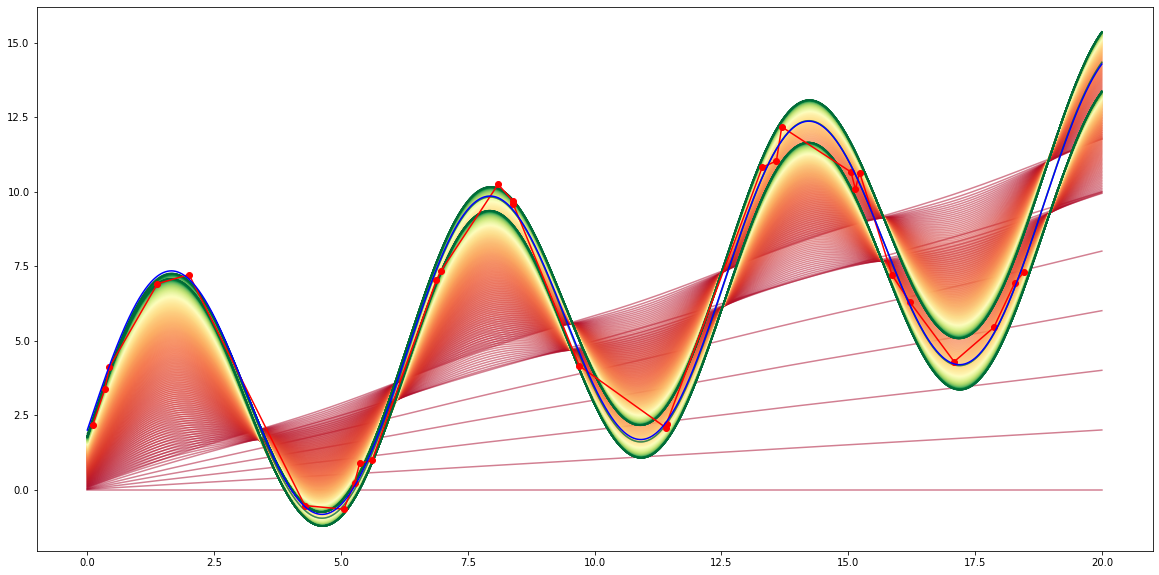

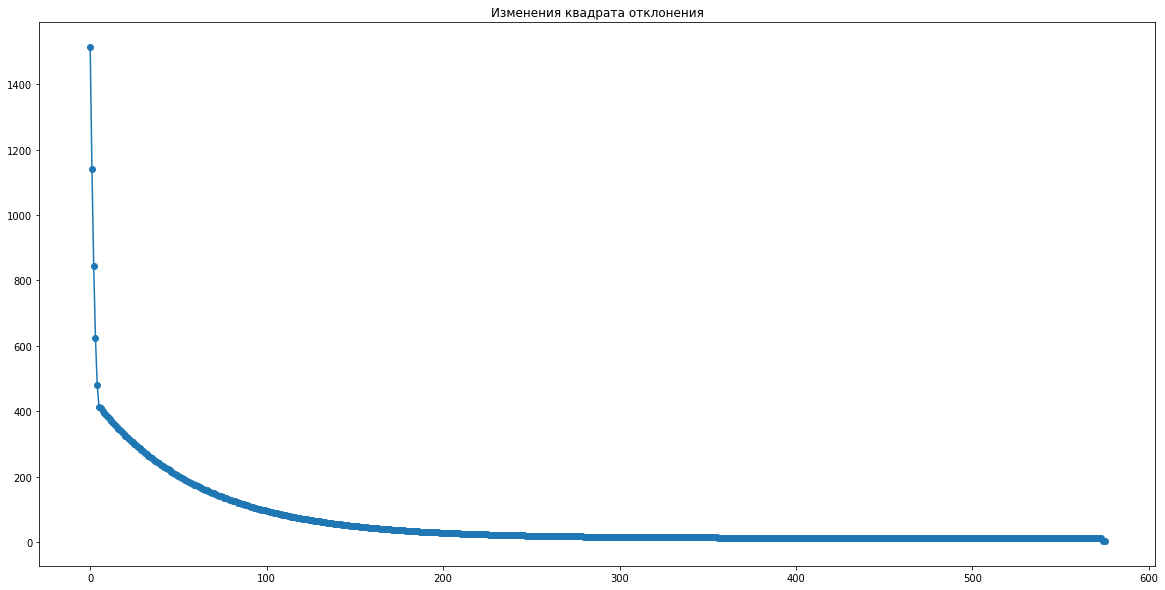

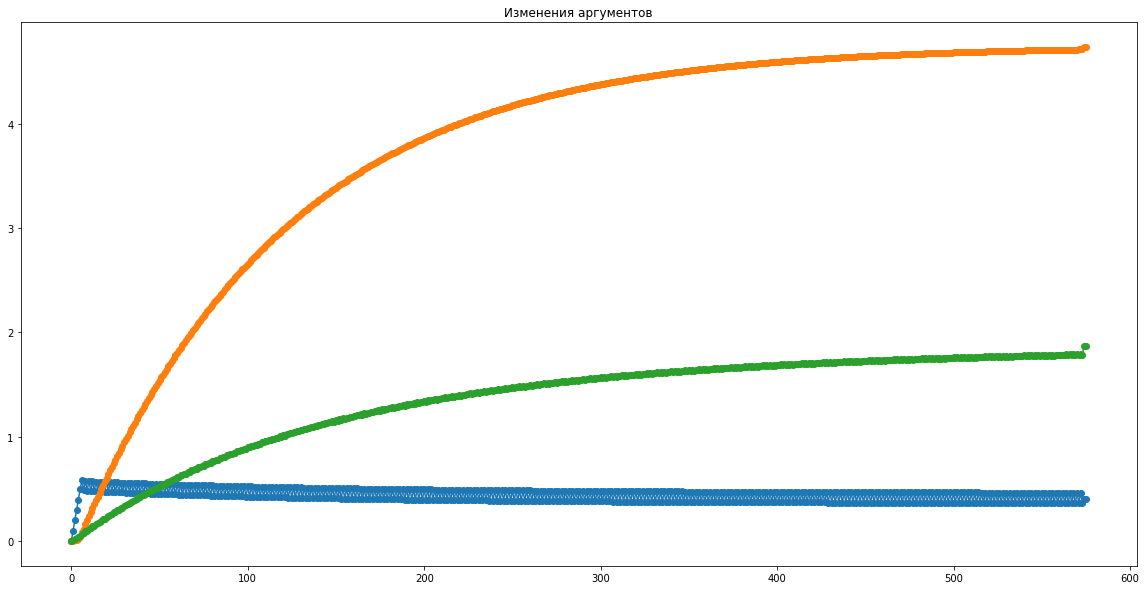

In [ ]:
f = f1_1_2d
A_start = np.array([0,0,0], float)
lr = 0.00006  # шаг
delta = 0.1 #
max_iterations = 1000  # макс.количество итераций
epsilon = 0.00001  # До какой точности будет разница функций
epsilon_binsearch = 0.01

A_curr, planes, val = powell_dog_leg(f, A_start, D, lr, delta, max_iterations, epsilon, epsilon_binsearch)
print(A_curr)
#print(val)
#print(planes)
print(val[-min(10, len(val)):])
print(planes[-min(10, len(planes)):])

plt.title("")
for i in range(0, len(planes)):
    plt.plot(t, np.array([f([j], planes[i]) for j in t]), "-", color=cm.RdYlGn(i / len(planes)), alpha=0.5)
plt.plot(D_sort[:, 0], D_sort[:, 1], "ro-")
plt.plot(t, np.array([f([i], A_gen) for i in t]), "b-")
#plt.plot(t, np.array([f([i], A_curr) for i in t]), "g-")
plt.show()

plt.title("Изменения квадрата отклонения")
plt.plot(val, 'o-')
plt.show()

plt.title("Изменения аргументов")
for i in range(len(A_curr)):
    plt.plot(planes[:, i], 'o-')
plt.show()

In [ ]:
def f2_1_2d(X): ## len(X) == 1
    if (len(X) != 1):
        raise
    from math import sin
    return 0.4*X[0] + 4.7*sin(X[0]) + 2

def f2_2_3d(X): ## len(X) == 2
    if (len(X) != 2):
        raise
    return (X[0])**2 - X[0]*X[1] + (X[1])**2 + 9*X[0] - 6*X[1] + 20

def f2_3_2d(X): ## len(X) == 1
    if (len(X) != 1):
        raise
    return X[0]**4

def f2_4_2d(X): ## len(X) == 1
    if (len(X) != 1):
        raise
    return abs(X[0])

### 2-е задание:
BFGS

In [ ]:
def gradForOne(f, X, i, lr):
    X_delta = X.copy()
    X_delta2 = X.copy()
    X_delta[i] += lr
    X_delta2[i] -= lr
    return (f(X_delta) - f(X_delta2)) / (2 * lr)

def grad(f, X, lr):
    Grad = np.array([None for i in range(len(X))])
    for i in range(len(X)):
        Grad[i] = gradForOne(f, X, i, lr)
    return Grad

def dist(A):
    return sum(i**2 for i in A)**0.5

def find_alpha(f, X, p, dF, lr): # подбор альфа по условиям Вольфе
    a = 1
    c1 = 1e-4 
    c2 = 0.9 
    X_new = X + a * p 
    new_dF = grad(f, X_new, lr)
    iter = 0
    while f(X_new) >= f(X) + (c1*a * dF.T @ p) or new_dF.T @ p <= c2 * dF.T @ p:
        if iter >= 1000:
            raise
        a *= 0.5
        X_new = X + a * p 
        new_dF = grad(f, X_new, lr)
        iter += 1
    return a

def BFGS(f, X, lr, max_iterations, epsilon):
    iterations_spent = 0
    n = len(X)
    planes = np.zeros((1, n))
    A_zn = f(X)
    val = np.array([A_zn])
    planes[0] = X

    I = np.eye(n, n)
    C = I.copy() # (Единичная матрица)^-1 = Единичная матрица
    dF = np.array([gradForOne(f, X, i, lr) for i in range(n)])

    while dist(dF) > epsilon:
        if iterations_spent >= max_iterations:
            print("Can't reach defined precision. It takes more than {} iterations".format(max_iterations))
            break

        p = - C @ dF

        a = find_alpha(f, X, p, dF, lr)
        s = a * p
        X = X + s

        new_dF = np.array([gradForOne(f, X, i, lr) for i in range(n)])
        y = new_dF - dF
        dF = new_dF

        yT = y.T
        sT = s.T
        ro = 1 / (yT @ s)

        C = (I - ro * s @ yT) @ C @ (I - ro * y @ sT) + ro * s @ sT

        A_zn = f(X)
        planes = np.append(planes, [X], axis=0)
        val = np.append(val, [A_zn])
        iterations_spent += 1

    return X, planes, val

[10.91036483]
[3.44310078 3.35504143 1.68546581 1.68122937 1.68119814 1.68119814]
[[10.        ]
 [11.77181809]
 [10.86764318]
 [10.91401652]
 [10.91035714]
 [10.91036483]]


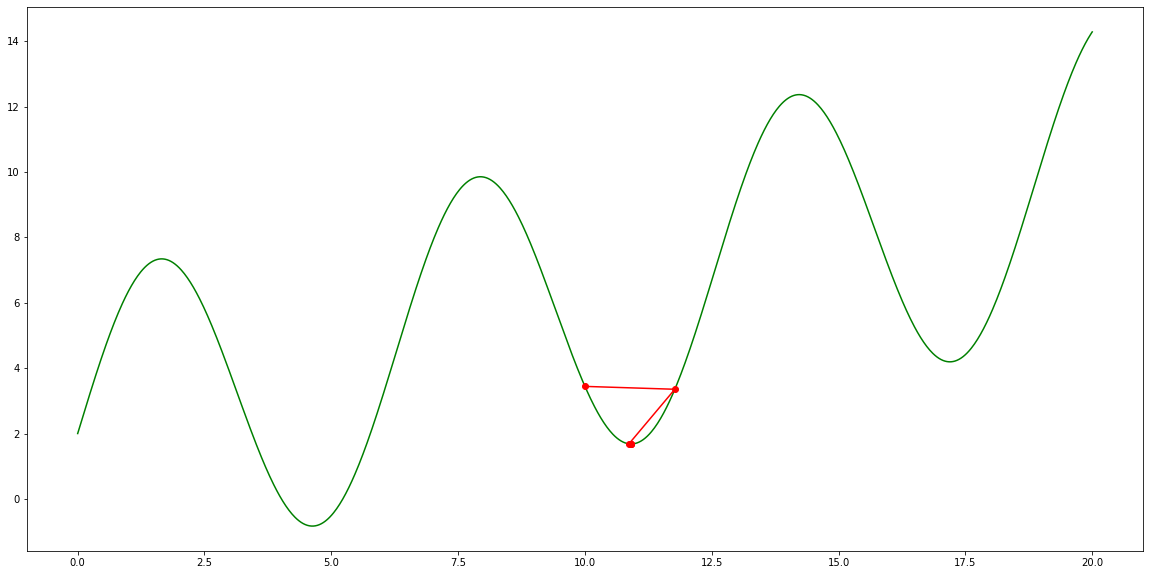

In [ ]:
f = f2_1_2d
X_start = np.array([10], float)
lr = 0.00006  # шаг
max_iterations = 1000  # макс.количество итераций
epsilon = 0.00001  # До какой точности будет разница функций

X_curr, planes, val = BFGS(f, X_start, lr, max_iterations, epsilon)
print(X_curr)
#print(val)
#print(planes)
print(val[-min(10, len(val)):])
print(planes[-min(10, len(planes)):])

#plt.plot(D_sort[:, 0], D_sort[:, 1], "ro-")
plt.plot(t, np.array([f([i]) for i in t]), "g-")
plt.plot(planes, val, "ro-")
#plt.plot(t, np.array([f([i], A_curr) for i in t]), "-")

plt.show()

[-0.01254125]
[0.00061634 0.00020013 0.00006499 0.0000211  0.00000685 0.00000223
 0.00000072 0.00000023 0.00000008 0.00000002]
[[-0.15756329]
 [-0.11894071]
 [-0.08978577]
 [-0.06777724]
 [-0.05116352]
 [-0.03862219]
 [-0.02915501]
 [-0.02200845]
 [-0.01661366]
 [-0.01254125]]


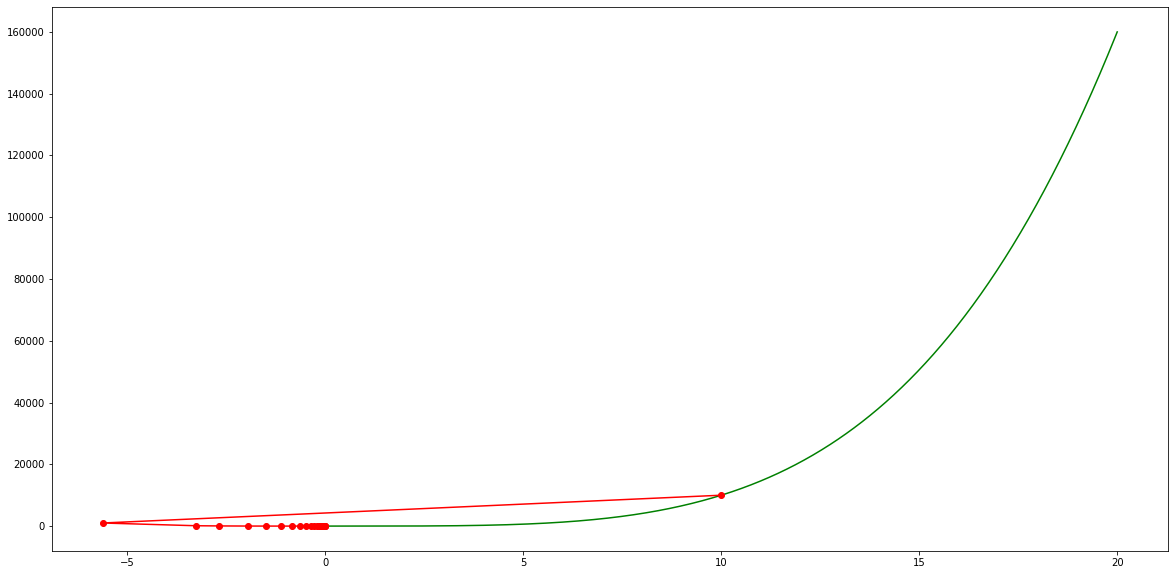

In [ ]:
f = f2_3_2d
X_start = np.array([10], float)
lr = 0.00006  # шаг
max_iterations = 1000  # макс.количество итераций
epsilon = 0.00001  # До какой точности будет разница функций

X_curr, planes, val = BFGS(f, X_start, lr, max_iterations, epsilon)
print(X_curr)
#print(val)
#print(planes)
print(val[-min(10, len(val)):])
print(planes[-min(10, len(planes)):])

#plt.plot(D_sort[:, 0], D_sort[:, 1], "ro-")
plt.plot(t, np.array([f([i]) for i in t]), "g-")
plt.plot(planes, val, "ro-")
#plt.plot(t, np.array([f([i], A_curr) for i in t]), "-")

plt.show()

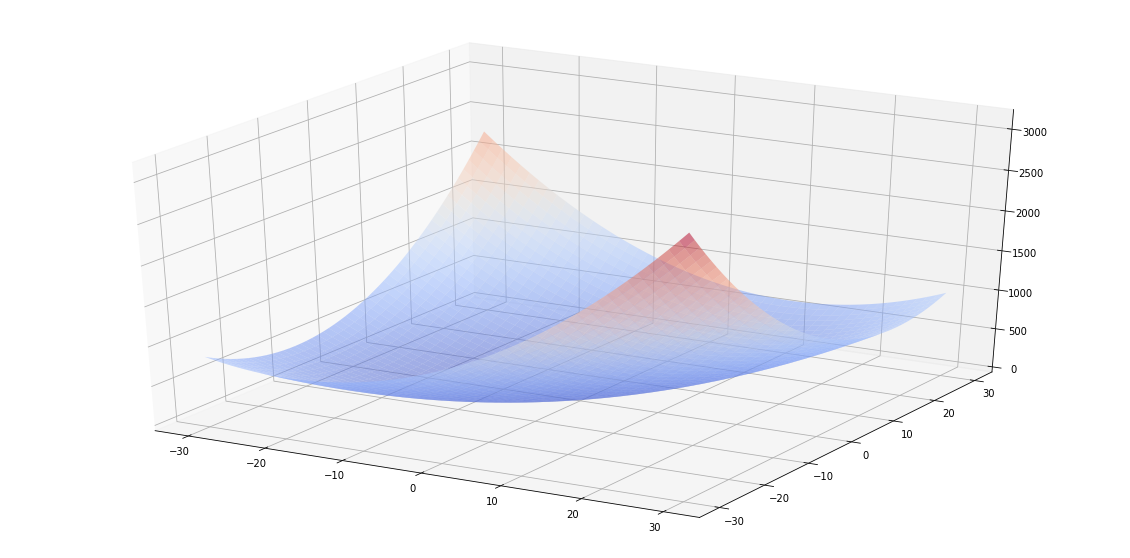

In [ ]:
def print_3d(f):
    t = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(t, t)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, f([X, Y]), cmap=cm.coolwarm, alpha=0.5)

print_3d(f2_2_3d)

[-4.00000373  1.00000039]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[[-3.9999784   1.00004776]
 [-4.00001445  1.00000926]
 [-3.9999982   1.00001662]
 [-4.00000844  1.00000499]
 [-3.99999731  1.00001109]
 [-4.00000589  1.00000171]
 [-3.99999947  1.00000671]
 [-4.00000434  1.00000126]
 [-3.99999923  1.00000532]
 [-4.00000373  1.00000039]]


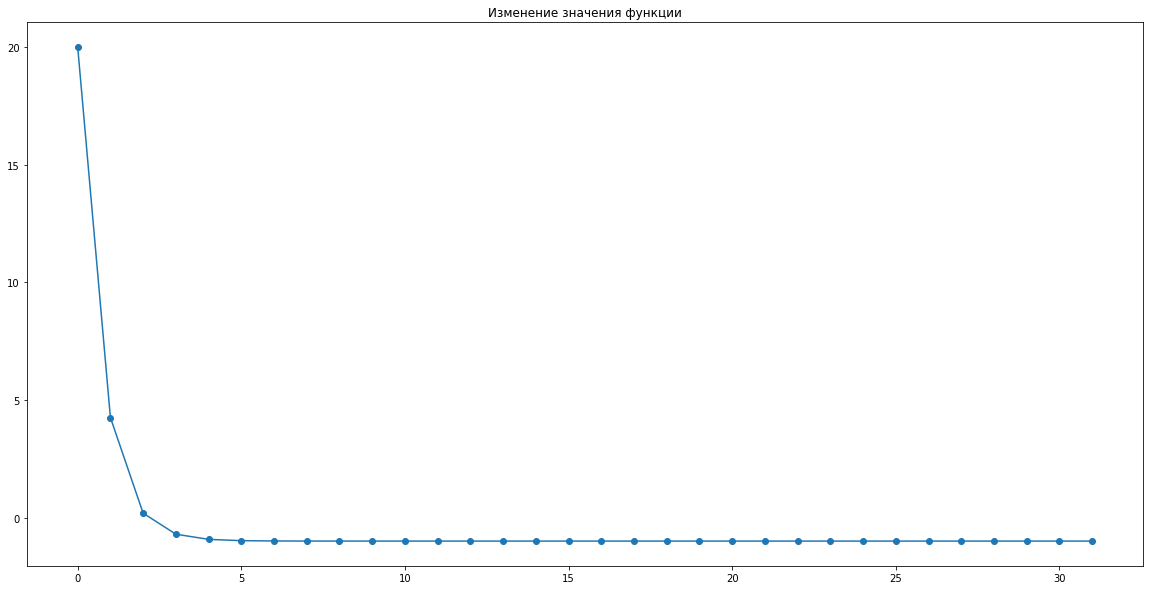

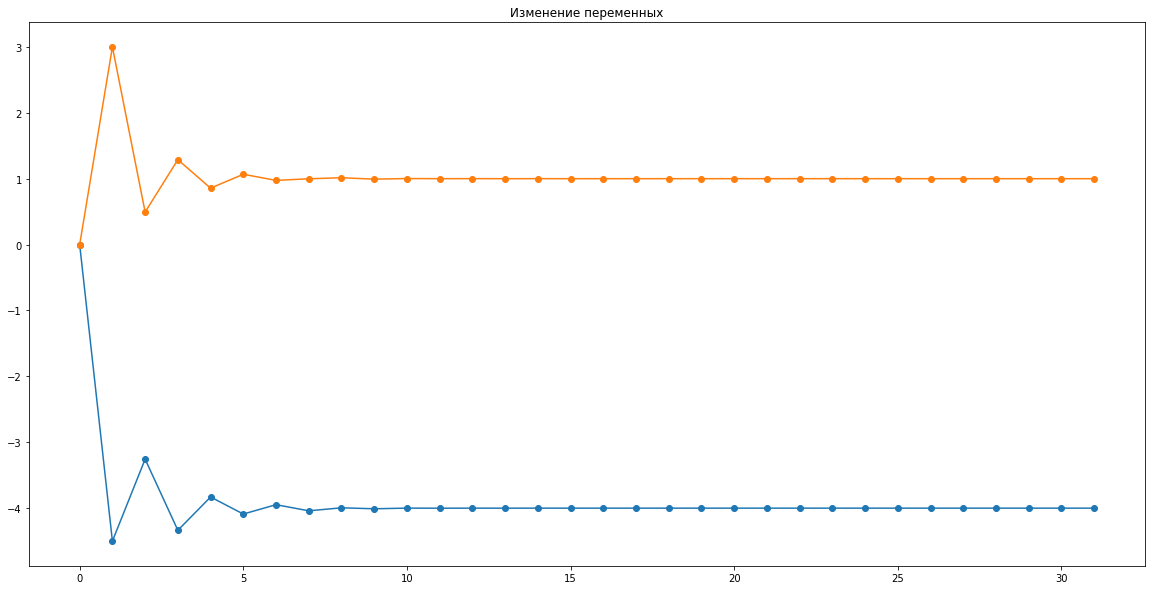

In [ ]:
f = f2_2_3d
X_start = np.array([0,0], float)
lr = 0.00006  # шаг
max_iterations = 1000  # макс.количество итераций
epsilon = 0.00001  # До какой точности будет разница функций

X_curr, planes, val = BFGS(f, X_start, lr, max_iterations, epsilon)
print(X_curr)
#print(val)
#print(planes)
print(val[-min(10, len(val)):])
print(planes[-min(10, len(planes)):])

#plt.plot(D_sort[:, 0], D_sort[:, 1], "ro-")
# plt.plot(t, np.array([f([i]) for i in t]), "g-")
# plt.plot(planes, val, "ro-")
#plt.plot(t, np.array([f([i], A_curr) for i in t]), "-")
#plt.show()

plt.title("Изменение значения функции")
plt.plot(val, 'o-')
plt.show()

plt.title("Изменение переменных")
for i in range(len(X_curr)):
    plt.plot(planes[:, i], 'o-')
plt.show()


### 3 задание:
L-BFGS

In [ ]:
def gradForOne(f, X, i, lr):
    X_delta = X.copy()
    X_delta2 = X.copy()
    X_delta[i] += lr
    X_delta2[i] -= lr
    return (f(X_delta) - f(X_delta2)) / (2 * lr)

def grad(f, X, lr):
    Grad = np.array([None for i in range(len(X))])
    for i in range(len(X)):
        Grad[i] = gradForOne(f, X, i, lr)
    return Grad

def dist(A):
    return sum(i**2 for i in A)**0.5

def find_alpha(f, X, p, dF, lr):
    a = 1
    c1 = 1e-4 
    c2 = 0.9 
    X_new = X + a * p 
    new_dF = grad(f, X_new, lr)
    iter = 0
    while f(X_new) >= f(X) + (c1*a * dF.T @ p) or new_dF.T @ p <= c2 * dF.T @ p:
        if iter >= 1000:
            raise
        a *= 0.5
        X_new = X + a * p 
        new_dF = grad(f, X_new, lr)
        iter += 1
    return a

from math import isnan

def L_BFGS(f, X, lr, m=4, max_iterations=1000, epsilon=0.00001):
    iterations_spent = 0
    n = len(X)
    planes = np.zeros((1, n))
    A_zn = f(X)
    val = np.array([A_zn])
    planes[0] = X

    I = np.eye(n, n)
    #C = I.copy() # (Единичная матрица)^-1 = Единичная матрица
    dF = np.array([gradForOne(f, X, i, lr) for i in range(n)])

    ro = np.array([0. for i in range(m)]) 
    a = ro.copy()
    s = np.array([np.array([1. for i in range(n)]) for i in range(m)])
    y = s.copy()

    # s[0] = np.array([1. for i in range(n)])
    # y[0] = np.array([1. for i in range(n)])

    while dist(dF) > epsilon:
        if iterations_spent >= max_iterations:
            print("Can't reach defined precision. It takes more than {} iterations".format(max_iterations))
            break

        #k = iterations_spent
        q = dF
        #for i in range(k-1, k-m, -1):
        for i in range(-1, -m, -1):
            a[i] = ro[i] * s[i].T @ q
            q = q - a[i] * y[i]


        # print(((s[-1].T @ y[-1]) / (y[-1].T @ y[-1]) ))
        # print()

        z = (((s[-1].T @ y[-1]) / (y[-1].T @ y[-1]) ) * I) @ q

        print("Gamma: ", ((s[-1].T @ y[-1]) / (y[-1].T @ y[-1]) ))
        print(q)
        # print(z)
        # print()

        for i in range(-1, -m, -1):
            beta = ro[i] * y[i].T @ z
            z = z + s[i] * (a[i] - beta)
        z = -z
        # if (isnan(z)):
        #     z = np.array([0. for i in range(n)])

        # print("z:", z)
        # print("dist z:", dist(z))
        # print()

        if (dist(z)) <= epsilon:
            break
        alpha = find_alpha(f, X, z, dF, lr)

        # print(a)
        # print()
        # print(ro)
        # print()
        # print(y)
        # print()
        # print(s)
        # print()

        ro = np.delete(ro, 0, axis=0)
        y = np.delete(y, 0, axis=0)
        s = np.delete(s, 0, axis=0)

        # print(ro)
        # print()
        # print(y)
        # print()
        # print(s)
        # print()

        s = np.append(s, [alpha * z], axis=0)
        X = X + s[-1]

        new_dF = np.array([gradForOne(f, X, i, lr) for i in range(n)])
        y = np.append(y, [new_dF - dF], axis=0)
        dF = new_dF

        # print(ro)
        # print()
        # print(y)
        # print()
        # print(s)
        # print()

        ro = np.append(ro, 1 / (y[-1].T @ s[-1]))

        # p = - C @ dF

        # a = find_alpha(f, X, p, dF, lr)
        # s = a * p
        # X = X + s

        # new_dF = np.array([gradForOne(f, X, i, lr) for i in range(n)])
        # y = new_dF - dF
        # dF = new_dF

        # yT = y.T
        # sT = s.T
        # ro = 1 / (yT @ s)

        # C = (I - ro * s @ yT) @ C @ (I - ro * y @ sT) + ro * s @ sT

        A_zn = f(X)
        planes = np.append(planes, [X], axis=0)
        val = np.append(val, [A_zn])
        iterations_spent += 1

    return X, planes, val

Gamma:  1.0
[32000.00000094]
Gamma:  0.0008290155440118239
[-0.]
Gamma:  0.0010303781259758142
[0.]


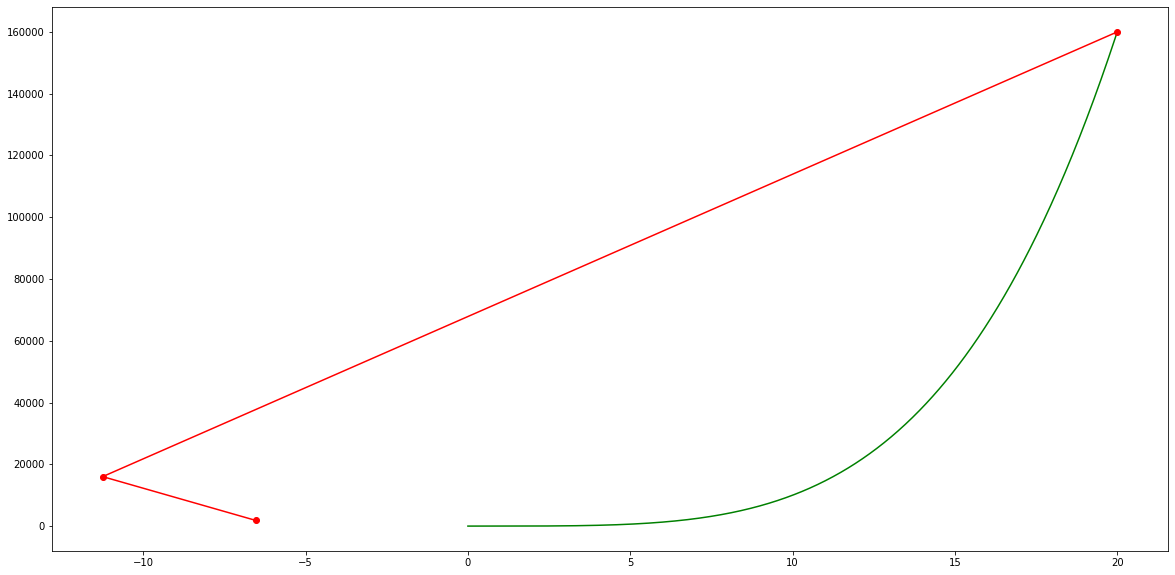

In [ ]:
f = f2_3_2d
X_start = np.array([20], float)
lr = 0.00006  # шаг
max_iterations = 1000  # макс.количество итераций
epsilon = 0.00001  # До какой точности будет разница функций

X_curr, planes, val = L_BFGS(f, X_start, lr)
#print(X_curr)
#print(val)
#print(planes)
#print(val[-min(10, len(val)):])
#print(planes[-min(10, len(planes)):])

#plt.plot(D_sort[:, 0], D_sort[:, 1], "ro-")
plt.plot(t, np.array([f([i]) for i in t]), "g-")
plt.plot(planes, val, "ro-")
#plt.plot(t, np.array([f([i], A_curr) for i in t]), "-")

plt.show()